# Tutorial 1: Designing Networks

This is the first in a series of tutorials about how to effectively use SNS-Toolbox. In this tutorial, we will design a simple non-spiking network with a single neuron and an applied current source.

## Step 1: Package Imports
The first step is importing the necessary packages.

In [1]:
"""
Import necessary packages and modules/classes
"""

# The following 5 lines are only necessary in a local jupiter build
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import sns_toolbox
from sns_toolbox.neurons import NonSpikingNeuron
from sns_toolbox.networks import Network
from sns_toolbox.connections import NonSpikingSynapse
from sns_toolbox.renderer import render

## Step 2: Define a Neuron Type

In [2]:
neuron_type = NonSpikingNeuron(name='Neuron',  # Name displayed in a render of the network
                               color='white',  # Fill color for the rendered neuron
                               membrane_capacitance=5.0,  # Membrane capacitance in nF
                               membrane_conductance=1.0,  # Membrane conductance in uS
                               bias=0.0)                # Tonic applied current in nA

In [3]:
"""
Create a network, and add multiple copies of our neuron to it
"""
# Create the network
net = Network(name='Tutorial 1 Network') # Optional parameters are a name and the value of 'R', in mV

# Add neurons to the network
net.add_neuron(neuron_type, name='Neuron 1', color='blue')
net.add_neuron(neuron_type, name='Neuron 2', color='black')

In [5]:
"""
Define some synapse types
"""
synapse_excitatory = NonSpikingSynapse()    # default parameters lead to strong excitation
synapse_inhibitory = NonSpikingSynapse(reversal_potential=-40.0) # make an inhibitory synapse

In [6]:
"""
Use our synapse types to connect the neurons in the network
"""
net.add_connection(synapse_excitatory, 'Neuron 1', 'Neuron 2')    # Add an excitatory synapse from neuron 1 to neuron 2
net.add_connection(synapse_inhibitory, 'Neuron 2', 'Neuron 1')   # Add an inhibitory synapse back from 2 to 1

# This can also be done using indices in the order the neurons were added to the network
# net.addSynapse(synapse,0,1)
# net.addSynapse(synapse_inhibitory,1,0)

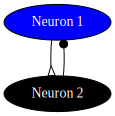

In [7]:
"""
View our network as a visual graph
"""
render(net)